In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#### Note
I failed to get the data set for the approved budget 25/26 ,I managed to get the draft and it is what I used for to answer this question.I downloaded it from the Ministry of Finance Data portal.

#### The Story path that I chose is  Sector allocation analysis:

In [ ]:
#Loading the dataset
df= pd.read_csv("data.csv" , encoding='latin1')
df.head()

,Vote_Code,Vote_Name,Programme_Code,Programme_Name,SubProgramme_Code,SubProgramme_Name,Sub_SubProgramme_Code,Sub_SubProgramme_Name,Department_Code,Department_Name,...,Wage,NonWage,AIARec,GoUDev,ExtFin,AIADev,WageArrears,NWagaArrears,GoUDEVArrears,Fiscal_Year
0,1,Office of the President,16,Governance And Security,0,Unspecified,3,"Government Mobilisation,Monitoring and people ...",1.0,Mobilisation and Security Services,...,-,"5,050,000,000",-,-,-,-,-,-,-,2025-2026
1,1,Office of the President,16,Governance And Security,0,Unspecified,4,Security Administration,1.0,Security Coordination,...,-,"25,000,000",-,-,-,-,-,-,-,2025-2026
2,1,Office of the President,16,Governance And Security,0,Unspecified,4,Security Administration,1.0,Security Coordination,...,-,"1,248,000,000",-,-,-,-,-,-,-,2025-2026
3,1,Office of the President,16,Governance And Security,0,Unspecified,4,Security Administration,1.0,Security Coordination,...,-,"10,000,000",-,-,-,-,-,-,-,2025-2026
4,1,Office of the President,16,Governance And Security,0,Unspecified,5,Effective Security Management,1.0,Integrated Intelligence Management,...,-,"40,000,000",-,-,-,-,-,-,-,2025-2026


In [ ]:
#Understanding the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20673 entries, 0 to 20672
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Vote_Code                  20673 non-null  int64  
 1   Vote_Name                  20673 non-null  object 
 2   Programme_Code             20673 non-null  int64  
 3   Programme_Name             20673 non-null  object 
 4   SubProgramme_Code          20673 non-null  int64  
 5   SubProgramme_Name          20673 non-null  object 
 6   Sub_SubProgramme_Code      20673 non-null  int64  
 7   Sub_SubProgramme_Name      20673 non-null  object 
 8   Department_Code            18373 non-null  float64
 9   Department_Name            18373 non-null  object 
 10  Project_Code               2300 non-null   float64
 11  Project_Name               2300 non-null   object 
 12  Budget_Output_Code         20673 non-null  int64  
 13  Budget_Output_Description  20673 non-null  obj

In [ ]:
# Drop unnecessary columns
df.drop(columns=["Project_Code","Project_Name","Fiscal_Year"], inplace=True)

In [ ]:
# Strip column names
df.columns = df.columns.str.strip()

# Budget-related columns
budget_fields = [
    'Wage', 'NonWage', 'AIARec', 'GoUDev', 'ExtFin',
    'AIADev', 'WageArrears', 'NWagaArrears', 'GoUDEVArrears'
]

# Clean each column
for field in budget_fields:
    df[field] = (
        df[field]
        .astype(str)                
        .str.strip()                  
        .replace('-', '0')            
        .str.replace(',', '', regex=False)  
        .astype(float)                
    )

# Confirm the result
print(df[budget_fields].describe())


               Wage       NonWage        AIARec        GoUDev        ExtFin  \
count  2.067300e+04  2.067300e+04  2.067300e+04  2.067300e+04  2.067300e+04   
mean   3.838226e+08  1.546669e+09  1.421651e+07  2.044046e+08  6.194361e+08   
std    1.453612e+10  7.495889e+10  2.044066e+09  1.131007e+10  1.980434e+10   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    0.000000e+00  3.000000e+06  0.000000e+00  0.000000e+00  0.000000e+00   
50%    0.000000e+00  2.000000e+07  0.000000e+00  0.000000e+00  0.000000e+00   
75%    0.000000e+00  1.000000e+08  0.000000e+00  0.000000e+00  0.000000e+00   
max    1.265010e+12  7.479435e+12  2.938980e+11  1.554391e+12  2.281110e+12   

        AIADev  WageArrears  NWagaArrears  GoUDEVArrears  
count  20673.0      20673.0       20673.0        20673.0  
mean       0.0          0.0           0.0            0.0  
std        0.0          0.0           0.0            0.0  
min        0.0          0.0           0.0           

In [15]:
# Group by Vote_Name and sum the key budget categories
sector_summary = df.groupby("Vote_Name")[
    ['Wage', 'NonWage', 'GoUDev', 'ExtFin', 'AIADev']
].sum().sort_values(by='NonWage', ascending=False)

# Add a Total column for total allocation per sector
sector_summary["Total_Allocation"] = sector_summary.sum(axis=1)

# Reset index for plotting
sector_summary = sector_summary.reset_index()

# Display top 10 sectors by total allocation
print(sector_summary.sort_values("Total_Allocation", ascending=False).head(10))


                                            Vote_Name          Wage  \
0                                 Treasury Operations  0.000000e+00   
2                                Ministry of Defence   1.266854e+12   
4                                Local Governments 12  2.752840e+12   
17                    Ministry of Works and Transport  1.717908e+10   
65             Uganda National Roads Authority (UNRA)  6.855261e+10   
1   Ministry of Finance, Planning and Economic Dev...  8.310350e+09   
29         Ministry of Energy and Mineral Development  1.671118e+10   
20                                 Ministry of Health  2.234571e+10   
54                  Ministry of Water and Environment  2.531317e+10   
5                                Local Governments 17  4.574692e+11   

         NonWage        GoUDev        ExtFin  AIADev  Total_Allocation  
0   2.072669e+13  0.000000e+00  0.000000e+00     0.0      2.072669e+13  
2   1.184179e+12  1.642927e+12  2.625416e+11     0.0      4.356502e+12  

C:\Users\enkurunziza\AppData\Local\Temp\ipykernel_61508\3463067003.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


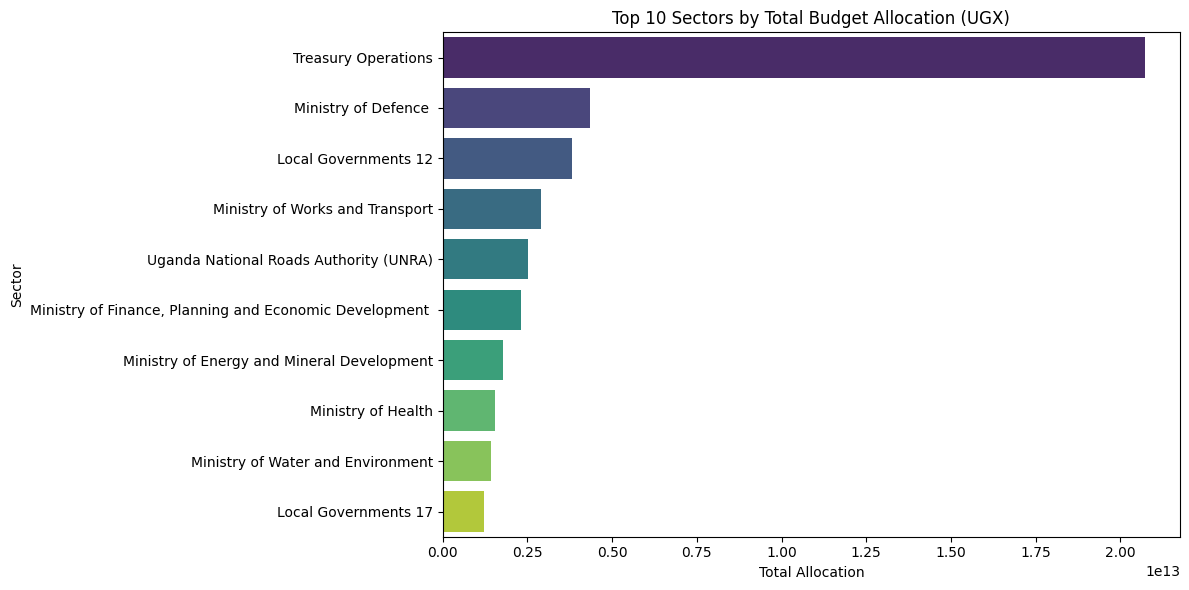

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort and select top 10
top10 = sector_summary.sort_values("Total_Allocation", ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top10,
    x="Total_Allocation",
    y="Vote_Name",
    palette="viridis"
)
plt.title("Top 10 Sectors by Total Budget Allocation (UGX)")
plt.xlabel("Total Allocation")
plt.ylabel("Sector")
plt.tight_layout()
plt.show()


In [17]:
# 1. Total national budget (sum of total allocations)
total_budget = sector_summary["Total_Allocation"].sum()

# 2. Add percentage share per sector
sector_summary["Share_of_Budget (%)"] = (sector_summary["Total_Allocation"] / total_budget) * 100

# Sort by share and display top 10
print(sector_summary.sort_values("Share_of_Budget (%)", ascending=False).head(10))


                                            Vote_Name          Wage  \
0                                 Treasury Operations  0.000000e+00   
2                                Ministry of Defence   1.266854e+12   
4                                Local Governments 12  2.752840e+12   
17                    Ministry of Works and Transport  1.717908e+10   
65             Uganda National Roads Authority (UNRA)  6.855261e+10   
1   Ministry of Finance, Planning and Economic Dev...  8.310350e+09   
29         Ministry of Energy and Mineral Development  1.671118e+10   
20                                 Ministry of Health  2.234571e+10   
54                  Ministry of Water and Environment  2.531317e+10   
5                                Local Governments 17  4.574692e+11   

         NonWage        GoUDev        ExtFin  AIADev  Total_Allocation  \
0   2.072669e+13  0.000000e+00  0.000000e+00     0.0      2.072669e+13   
2   1.184179e+12  1.642927e+12  2.625416e+11     0.0      4.356502e+12

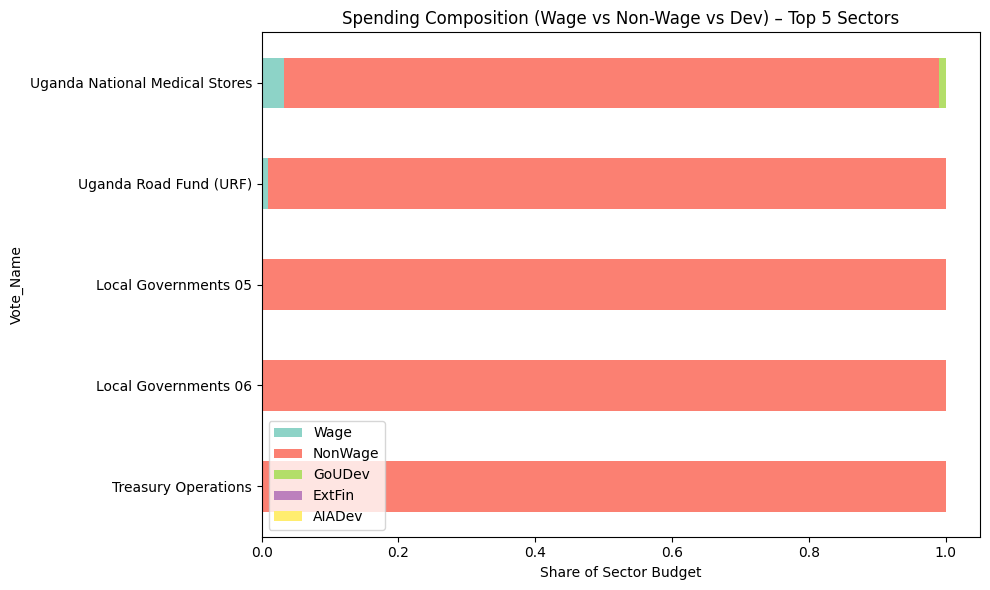

In [18]:
# Normalize for comparison
composition = sector_summary[['Vote_Name', 'Wage', 'NonWage', 'GoUDev', 'ExtFin', 'AIADev']].copy()
composition.set_index("Vote_Name", inplace=True)

# Calculate relative composition per sector
composition_ratio = composition.div(composition.sum(axis=1), axis=0)

# Plot stacked bar chart for top 5 sectors
top5_sectors = composition_ratio.sort_values("NonWage", ascending=False).head(5)

# Plot
top5_sectors.plot(kind='barh', stacked=True, figsize=(10, 6), colormap='Set3')
plt.title("Spending Composition (Wage vs Non-Wage vs Dev) – Top 5 Sectors")
plt.xlabel("Share of Sector Budget")
plt.tight_layout()
plt.show()


In [20]:
df.to_csv("cleaned_budget.csv", index=False)

In [3]:
import dash
from dash import dcc, html, Input, Output
import pandas as pd
import plotly.express as px

# --- Load and prepare your cleaned data ---
df = pd.read_csv("cleaned_budget.csv") 

# Grouped data
sector_summary = df.groupby("Vote_Name")[['Wage', 'NonWage', 'GoUDev', 'ExtFin', 'AIADev']].sum()
sector_summary["Total_Allocation"] = sector_summary.sum(axis=1)
sector_summary["Share_of_Budget (%)"] = (sector_summary["Total_Allocation"] / sector_summary["Total_Allocation"].sum()) * 100
sector_summary = sector_summary.reset_index()

# Initialize Dash app
app = dash.Dash(__name__)
app.title = "Uganda Budget 2025/26 - Sector Allocation Dashboard"

# Layout
app.layout = html.Div([
    html.H1("Sector Allocation Analysis – Uganda 2025/2026 Budget", style={'textAlign': 'center'}),
    
    html.Div([
        html.Label("Select a Sector (Vote Name):"),
        dcc.Dropdown(
            id='sector-dropdown',
            options=[{'label': name, 'value': name} for name in sector_summary['Vote_Name']],
            value=sector_summary['Vote_Name'][0]
        ),
    ], style={'width': '40%', 'margin': 'auto'}),

    html.Br(),

    html.Div(id='kpi-output', style={'textAlign': 'center', 'fontSize': 18}),

    dcc.Graph(id='sector-bar-chart'),

    dcc.Graph(id='spending-composition')
])

# Callbacks
@app.callback(
    Output('kpi-output', 'children'),
    Output('sector-bar-chart', 'figure'),
    Output('spending-composition', 'figure'),
    Input('sector-dropdown', 'value')
)
def update_dashboard(selected_sector):
    selected_row = sector_summary[sector_summary['Vote_Name'] == selected_sector].iloc[0]
    
    # KPIs
    kpi_text = f"""
        Total Allocation for {selected_sector}: UGX {selected_row['Total_Allocation']:,.0f} |
        Share of Budget: {selected_row['Share_of_Budget (%)']:.2f}%
    """

    # Bar chart (top 10 sectors by total allocation)
    bar_fig = px.bar(
        sector_summary.sort_values("Total_Allocation", ascending=False).head(10),
        x="Total_Allocation", y="Vote_Name",
        orientation="h",
        title="Top 10 Sectors by Total Allocation",
        labels={"Total_Allocation": "UGX", "Vote_Name": "Sector"},
        color="Total_Allocation"
    )
    bar_fig.update_layout(yaxis={'categoryorder':'total ascending'})

    # Spending mix chart
    spending_data = sector_summary[sector_summary['Vote_Name'] == selected_sector][['Wage', 'NonWage', 'GoUDev', 'ExtFin', 'AIADev']].T.reset_index()
    spending_data.columns = ['Category', 'Amount']
    comp_fig = px.pie(
        spending_data, names='Category', values='Amount',
        title=f"Spending Composition for {selected_sector}"
    )

    return kpi_text, bar_fig, comp_fig

# Run app
if __name__ == '__main__':
    app.run(debug=True, port= 8071)


In [5]:
# Convert monetary columns to numeric (remove commas, handle dashes or blanks)
monetary_cols = ['Wage', 'NonWage', 'AIARec', 'GoUDev', 'ExtFin', 'AIADev',
                 'WageArrears', 'NWagaArrears', 'GoUDEVArrears']

for col in monetary_cols:
    # Convert to string first, then clean, then back to float
    df[col] = df[col].astype(str).str.replace('-', '0').str.replace(',', '').astype(float)


# Create a total allocation column
df['Total_Allocation'] = df[monetary_cols].sum(axis=1)


##### Funding Patterns

In [ ]:
# Allocation by Programme
top_programmes = df.groupby("Programme_Name")["Total_Allocation"].sum().sort_values(ascending=False)
print(top_programmes.head(10))

Programme_Name
Development Plan Implementation                     2.212987e+13
Human Capital Development                           9.974895e+12
Governance And Security                             7.537854e+12
Integrated Transport Infrastructure And Services    6.354023e+12
Private Sector Development                          1.890710e+12
Regional Balanced Development                       1.722361e+12
Agro-Industrialization                              1.689352e+12
Sustainable Energy Development                      1.301622e+12
Sustainable Urbanisation And Housing                1.176341e+12
Legislation, Oversight And Representation           8.334951e+11
Name: Total_Allocation, dtype: float64


In [ ]:
#Allocation by Department
top_departments = df.groupby("Department_Name")["Total_Allocation"].sum().sort_values(ascending=False)
print(top_departments.head(10))

Department_Name
Administration                             2.212481e+13
Education                                  2.356086e+12
UPDF Land forces                           2.124338e+12
Financial Services                         1.307218e+12
Finance and Administration                 1.189534e+12
Health                                     1.038143e+12
Central Administration                     6.191116e+11
Pharmaceuticals & Other Health Supplies    5.372965e+11
Members of Parliament                      5.117152e+11
Road Fund Secretariat                      3.997446e+11
Name: Total_Allocation, dtype: float64


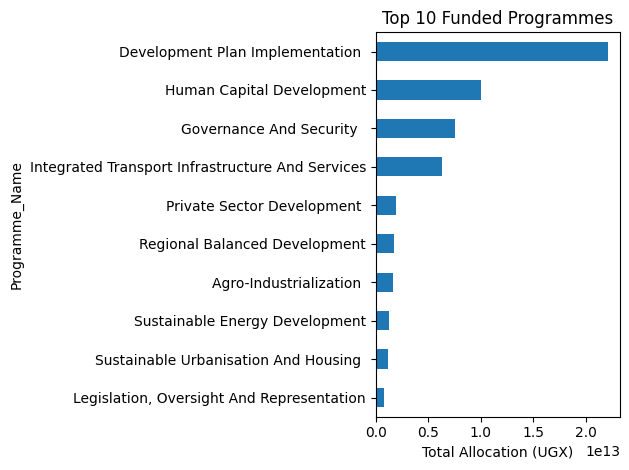

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

top_programmes.head(10).plot(kind='barh')
plt.title("Top 10 Funded Programmes")
plt.xlabel("Total Allocation (UGX)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [ ]:
# Allocation by budget lines
top_items = df.groupby("Description")["Total_Allocation"].sum().sort_values(ascending=False).head(10)
print(top_items)


Description
Interest on Treasury Bonds            7.479435e+12
Securities Redemption Budgeting       6.611577e+12
Transfer to Other Government Units    3.715733e+12
General Staff Salaries                3.459336e+12
External Debt Budgeting               3.396513e+12
Sector Conditional Grant (Wage)       2.894346e+12
Roads and Bridges - Acquisition       2.373786e+12
Railways and subways - Improvement    2.314720e+12
Classified Expenditure                2.042521e+12
Loan interest                         1.265437e+12
Name: Total_Allocation, dtype: float64


##### Fairness Analysis

In [13]:
dept_share = df.groupby("Department_Name")["Total_Allocation"].sum()
dept_share_pct = dept_share / dept_share.sum() * 100
print(dept_share_pct.sort_values(ascending=False).head())

Department_Name
Administration                55.032812
Education                      5.860480
UPDF Land forces               5.284036
Financial Services             3.251548
Finance and Administration     2.958822
Name: Total_Allocation, dtype: float64


#### Narrative
Some sectors such as Education, Health, and Agriculture continue to receive significantly lower allocations compared to Infrastructure and Security, despite their direct impact on human capital and poverty alleviation. For instance, while infrastructure projects dominate with large capital investments, education and health often rely heavily on donor support, revealing an imbalance in prioritization.

#### Call to Action
Adopt equity-focused frameworks that ensure allocations are guided by need and impact. 

Reallocate portions of the budget to strengthen sectors that build long-term resilience: education, healthcare, and agriculture. These investments have high social returns and directly influence productivity and welfare.

#### Key Perfomance INDICATORS
##### 1. Sector Budget Share (%) AS indicated on the Dashboard at the end of this script
Percentage of the total national budget allocated to a specific sector.It helps policymakers assess whether priority sectors are being adequately funded relative to their importance in national development goals

##### 2. Per Capita Allocation
This metric adjusts for population differences and enables fairness analysis, helping to identify underserved regions or populations, particularly in health, education, and social development.

### Interactive Dashboard

In [ ]:
import dash
from dash import dcc, html, Input, Output
import pandas as pd
import plotly.express as px

# Loading cleaned data
df = pd.read_csv("cleaned_budget.csv") 
df.columns = df.columns.str.strip()

# Starting Dash app
app = dash.Dash(__name__)
app.title = "Uganda Budget Dashboard"

# Layout
app.layout = html.Div([
    html.H2("Uganda Budget 2025/26 – Sector Allocation Dashboard", style={"textAlign": "center"}),

    html.Div([
        html.Div([
            html.Label("🌟 Select Sector (Vote):"),
            dcc.Dropdown(
                id='sector-dropdown',
                options=[{"label": v, "value": v} for v in df["Vote_Name"].unique()],
                value=df["Vote_Name"].unique()[0],
                style={"marginBottom": "1em"}
            ),

            html.Label("📚 Select Programme (optional):"),
            dcc.Dropdown(
                id='programme-dropdown',
                options=[],
                placeholder="All Programmes",
                style={"marginBottom": "2em"}
            ),

            html.A("⬇️ Download Data", id="download-link", download="sector_summary.csv", href="", target="_blank",
                   style={"display": "block", "textAlign": "center", "fontWeight": "bold"}),

        ], style={"width": "30%", "padding": "1em", "backgroundColor": "#f9f9f9", "borderRight": "1px solid #ddd"}),

        html.Div([
            html.Div(id="kpi-output", style={"fontSize": 18, "marginBottom": "1em", "textAlign": "center"}),

            dcc.Graph(id='bar-chart'),
            dcc.Graph(id='spending-pie'),
            dcc.Graph(id='bottom-bar')
        ], style={"width": "70%", "padding": "1em"})

    ], style={"display": "flex", "flexDirection": "row", "height": "100vh"})
])

# Update programme dropdown based on selected sector
@app.callback(
    Output('programme-dropdown', 'options'),
    Input('sector-dropdown', 'value')
)
def update_programmes(sector):
    progs = df[df["Vote_Name"] == sector]["Programme_Name"].dropna().unique()
    return [{"label": p, "value": p} for p in progs]

# Main dashboard update
@app.callback(
    Output("kpi-output", "children"),
    Output("bar-chart", "figure"),
    Output("spending-pie", "figure"),
    Output("bottom-bar", "figure"),
    Output("download-link", "href"),
    Input("sector-dropdown", "value"),
    Input("programme-dropdown", "value")
)
def update_dashboard(sector, programme):
    filtered = df[df["Vote_Name"] == sector]

    # If programme is selected
    if programme:
        filtered = filtered[filtered["Programme_Name"] == programme]

    # Summary of selected data
    summary = filtered[['Wage', 'NonWage', 'GoUDev', 'ExtFin', 'AIADev']].sum()
    total = summary.sum()
    national_total = df[['Wage', 'NonWage', 'GoUDev', 'ExtFin', 'AIADev']].sum().sum()
    share = (total / national_total) * 100

    title = f"{programme} – {sector}" if programme else sector
    kpi_text = f"💰 Total Allocation: UGX {total:,.0f} | 📊 Share of Budget: {share:.2f}%"

    # Bar chart of top programmes in the sector
    bar_data = df[df["Vote_Name"] == sector].groupby("Programme_Name")[['Wage', 'NonWage', 'GoUDev', 'ExtFin', 'AIADev']].sum()
    bar_data["Total"] = bar_data.sum(axis=1)
    bar_data = bar_data.sort_values("Total", ascending=False).reset_index()

    bar_fig = px.bar(
        bar_data.head(10),
        x="Total", y="Programme_Name", orientation="h",
        title=f"Top Programmes in {sector} by Allocation",
        labels={"Total": "UGX"},
        color="Total"
    )
    bar_fig.update_layout(yaxis={'categoryorder': 'total ascending'})

    # Pie chart for spending mix
    spend = summary.reset_index()
    spend.columns = ['Component', 'Amount']
    pie_fig = px.pie(spend, names='Component', values='Amount', title=f"Spending Composition – {title}")

    # Bottom 10 sectors chart (if programme is not selected)
    if not programme:
        bottom_data = df.groupby("Vote_Name")[['Wage', 'NonWage', 'GoUDev', 'ExtFin', 'AIADev']].sum()
        bottom_data["Total"] = bottom_data.sum(axis=1)
        bottom_data = bottom_data.sort_values("Total", ascending=True).reset_index()

        bottom_fig = px.bar(
            bottom_data.head(10),
            x="Total", y="Vote_Name", orientation="h",
            title="Bottom 10 Sectors by Total Allocation",
            labels={"Total": "UGX", "Vote_Name": "Sector"},
            color="Total"
        )
        bottom_fig.update_layout(yaxis={'categoryorder': 'total ascending'})
    else:
        bottom_fig = {}

    # CSV download link
    csv_data = bar_data.to_csv(index=False)
    href = "data:text/csv;charset=utf-8," + csv_data

    return kpi_text, bar_fig, pie_fig, bottom_fig, href

# Run the server
if __name__ == '__main__':
    app.run(debug=True, port=8093)
